In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1d diffusion process

In [5]:
from tqdm import tqdm
from scipy.stats import linregress
import pickle as pkl

## generate data for training - unself similarity

In [9]:
'density field change with time, the output size = batch, step * grid_size'
batch = 1
grid_size = 1000
# number of patical
N = 1000
# diffusion step
steps = 2000
scale=1
# initialize grid
grids = np.zeros([batch, steps, grid_size])
for b in tqdm(range(batch)):
    grid = np.zeros([steps,grid_size])
    # initialize the position for first step
    posi = np.random.randint(0,grid_size)#grid_size//2
    position = np.array([int(i) for i in np.ones(N)*posi])
    grid[0, position] = N
    # avalible direction for each step 
    directions = [-1,1]
    for i in range(steps-1):
        # random choose a direction
        direction = np.random.choice([-scale, scale], N)
        # update the postion of particle
        position = np.array([int(i) for i in (position + direction) % grid_size])
        # move forward
        for x in range(N):
            grid[i+1, position[x]] =grid[i+1, position[x]] + 1
    # normalization
    grids[b,:,:] = grid/N



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.73s/it]


In [10]:
grids.shape,np.sum(grids[0,:,:],axis=-1)

((1, 2000, 1000), array([1., 1., 1., ..., 1., 1., 1.]))

In [11]:
# with open('./data/diffusion_process_1d_discrite.pkl','wb') as f:
#     pkl.dump(grids, f)
with open('./data/diffusion_process_1d_discrite.pkl','rb') as f:
    grids = pkl.load(f)
grids.shape

(100, 2000, 1000)

s_group: 3
100 1998 999
center: [279  99  54  15  84  79   7 160 119  90 264  81  96 223 236 134 220 135
 133 241  47  13  98 129  91 211  28 157  84  25  75  94  97 204 236 297
  85 252 104 206 224 134 318 304 254 192  97 195 201  32 321  55  26 269
 100 236 318  11 120 176  51 210 136  50  64  13 116 302 219 246  22 110
  81 271  46 271 327  90  21 168 199  18 302  97 154 330 327 237 239 127
 231 131 174 111 168   8 246 269 136 252]


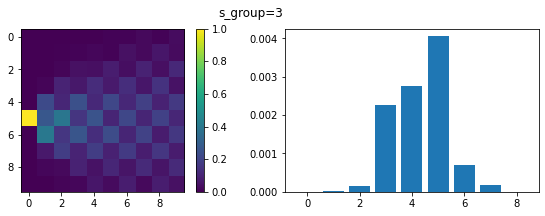

s_group: 5
100 2000 1000
center: [167  59  32   9  50  47   4  96  71  54 158  48  57 134 141  80 132  81
  80 144  28   8  58  77  54 126  17  94  50  15  45  56  58 122 141 178
  51 151  62 124 134  80 190 182 152 115  58 117 120  19 192  33  15 161
  60 141 191   6  72 106  30 126  81  30  38   7  69 181 131 147  13  66
  48 163  27 162 196  54  13 101 119  11 181  58  92 198 196 142 143  76
 138  78 104  66 100   5 148 161  82 151]


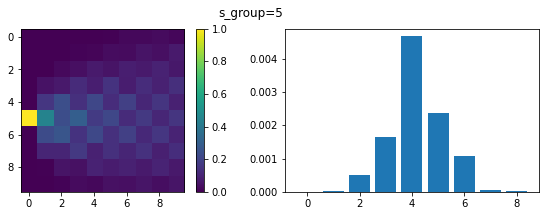

s_group: 7
100 1960 994
center: [119  42  23   6  36  34   3  68  51  38 113  34  41  95 101  57  94  58
  57 103  20   5  42  55  39  90  12  67  36  10  32  40  41  87 101 127
  36 108  44  88  96  57 136 130 109  82  41  83  86  14 137  23  11 115
  43 101 136   4  51  75  22  90  58  21  27   5  49 129  94 105   9  47
  34 116  19 116 140  38   9  72  85   8 129  41  66 141 140 101 102  54
  99  56  74  47  72   3 105 115  58 108]


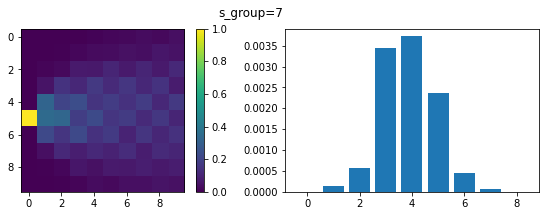

s_group: 9
100 1944 999
center: [ 93  33  18   5  28  26   2  53  39  30  88  27  32  74  78  44  73  45
  44  80  15   4  32  43  30  70   9  52  28   8  25  31  32  68  78  99
  28  84  34  68  74  44 106 101  84  64  32  65  67  10 107  18   8  89
  33  78 106   3  40  58  17  70  45  16  21   4  38 100  73  82   7  36
  27  90  15  90 109  30   7  56  66   6 100  32  51 110 109  79  79  42
  77  43  58  37  56   2  82  89  45  84]


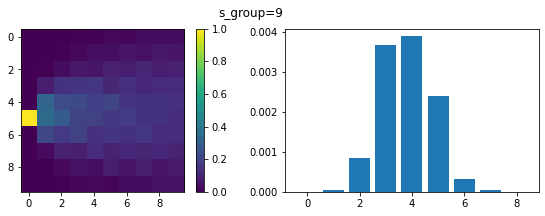

In [18]:
'''
renormalization by hand:
rule: 
1. sum over the space lattice
2. take the interval of time
choose different group size as 's_group',here we choose s_group=3,5,7,9
'''
kernel_size = 9
for s_group in np.linspace(1,11,6):
   
    if s_group==1 or s_group==11:
        continue
    
    s_group = int(s_group)
    print('s_group:',s_group)
    #time group size 't_group' is s_group^2 as defualt
    t_group = s_group*s_group
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    
    aa = grids[:,:t_group*int(grids.shape[1]//t_group),:s_group*int(grids.shape[2]//s_group)]
    
    'size after normalization'
    b = aa.shape[0]
    t = aa.shape[1]
    L = aa.shape[2]
    print(b,t,L)

    aa = aa.reshape(b,t,-1, s_group)
    # sum over the space lattice with s_group
    space_macro = aa.sum(axis=-1)
    # take the interval of time with t_time
    # macro_data is the matrix after renormalization
    macro_data = space_macro[:,::t_group,:]
    center = np.where(macro_data[:,0,:] == 1)[1]
    print('center:',center)
    
    #Take kernel size=9 as an example to extract the kernel distribution of data
    center_index = np.where((center<macro_data.shape[-1]-5) & (center>4))[0]
    for b in range(macro_data.shape[0]):
        kernels = np.zeros([len(center_index),1,9])
        count = 0
        if center[b] < macro_data.shape[-1]-5 and  center[b] > 4:
            kernels[count] = macro_data[b,1:2,center[b]-4:center[b]+5]

    plt.imshow(macro_data[-1,:10,center[-1]-5:center[-1]+5].T)
    plt.colorbar()
    plt.subplot(122)
    plt.bar(range(kernels.shape[-1]),np.mean(kernels,axis=0)[0,:])

    plt.suptitle(f's_group={s_group}')
    plt.show()
#     with open(f'./data/diffusion_process_1d_discrite_macro_s_group={s_group}.pkl','wb') as f:
#         pkl.dump(macro_data, f)

In [19]:

'''
renormalization by hand:
rule: 
1. sum over the space lattice
2. take the interval of time
choose different group size as 's_group',here we choose s_group=3,5,7,9

we control the original size to permite the size of macro matrix are 100*100
'''
batch = 20
s_group = 3
grid_size = 100 * s_group
'number of particles'
N = 1000
# diffusion steps
steps = 100*s_group*s_group
scale=1
grids = np.zeros([batch,steps, grid_size])
print(grids.shape)
for b in tqdm(range(batch)):

    grid = np.zeros([steps,grid_size])
    # initialize the position for first step
    posi = np.random.randint(0,grid_size)#
    position = np.array([int(i) for i in np.ones(N)*posi])
    # initialize the position at center for first step
    #position = np.array([int(i) for i in np.ones(N)*grid_size // 2])#(grid_size // 2, grid_size // 2)
    grid[0, position] = N

    # avalible direction for each step 
    directions = [-1,1]
    for i in range(steps-1):
        # random choose a direction
        direction = np.random.choice([-scale, scale], N)
        # update the postion of particle
        position = np.array([int(i) for i in (position + direction) % grid_size])
        # move forward
        for x in range(N):
            grid[i+1,position[x]] =grid[i+1,position[x]] + 1
    # normalization
    grids[b,:,:] = grid/N
    
    s_group = int(s_group)
    t_group = s_group*s_group
    aa = grids[:,:t_group*int(grids.shape[1]//t_group),:s_group*int(grids.shape[2]//s_group)]

    b = aa.shape[0]
    t = aa.shape[1]
    L = aa.shape[2]
    
    aa = aa.reshape(batch,t,-1, s_group)
    # sum over the space lattice with s_group
    space_macro = aa.sum(axis=-1)
    # take the interval of time with t_time
    # macro_data is the matrix after renormalization
    macro_data = space_macro[:,::t_group,:]


(20, 900, 300)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:15<00:00,  1.30it/s]


In [445]:
with open(f'./data/diffusion_process_1d_discrite_macro_s_group={s_group}.pkl','wb') as f:
    pkl.dump(macro_data, f)

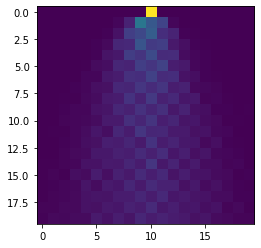

In [20]:
macro_data.shape
s_group = 5

with open(f'./data/diffusion_process_1d_discrite_macro_s_group={s_group}_center.pkl','rb') as f:
# with open(f'./data/diffusion_process_1d_discrite_macro_s_group={s_group}_center.pkl','wb') as f:
    macro_data = pkl.load(f)
plt.imshow(macro_data[0,:20,40:60])

In [21]:
macro_data.shape

(10, 100, 100)

In [22]:

center_index = np.where((center<macro_data.shape[-1]-5) & (center>4))[0]
center_filter = center[center_index]
center_filter

array([93, 33, 18,  5, 28, 26, 53, 39, 30, 88, 27, 32, 74, 78, 44, 73, 45,
       44, 80, 15, 32, 43, 30, 70,  9, 52, 28,  8, 25, 31, 32, 68, 78, 28,
       84, 34, 68, 74, 44, 84, 64, 32, 65, 67, 10, 18,  8, 89, 33, 78, 40,
       58, 17, 70, 45, 16, 21, 38, 73, 82,  7, 36, 27, 90, 15, 90, 30,  7,
       56, 66,  6, 32, 51, 79, 79, 42, 77, 43, 58, 37, 56, 82, 89, 45, 84])

In [25]:
center = np.where(macro_data[:,0,:] == 1)[1]
print('center:',center)

center: [50 50 50 50 50 50 50 50 50 50]


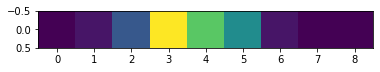

In [26]:
macro_data[:,:,center].shape
for b in range(macro_data.shape[0]):
    
    center_index = np.where((center<macro_data.shape[-1]-5) & (center>4))[0]
    kernels = np.zeros([len(center_index),1,9])
    count = 0
    if center[b] < macro_data.shape[-1]-5 and  center[b] > 4:
#         print(center[b])
        kernels[count] = macro_data[b,1:2,center[b]-4:center[b]+5]
        count += 1
#         continue
plt.imshow(np.mean(kernels,axis=0))
plt.show()

## Guassion Diffusion - perfect self-similar dynamics
$u(x,t) = \frac{1} {\sqrt{4 \pi Dt}} e ^{- \frac{x^{2}} {4Dt}}$

In [27]:

T = 200 # evolution time
dt = 1  # time interval
steps = int(T/dt)
space = np.arange(0,100,1)
D =0.5
L = len(space)
repeats = 50
pt = np.zeros([repeats,steps,L])
init_space = np.random.randint(30,70,repeats)

for r in range(repeats):
    center = init_space[r]
    pt[r,0,init_space[r]] = 1
    
    for step in range(steps-1):
        step = step+1
        pt[r,step,:] = 1/(np.sqrt(4*np.pi*D*step)) * np.exp(-(space-center)**2/(4*D*step))



In [104]:
with open('./data/diffusion_process_1d_pt.pkl','wb') as f:
    pkl.dump(pt, f)

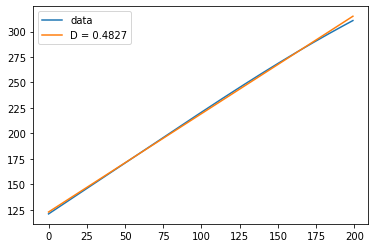

In [30]:
grid = pt[0,:,:]
steps = grid.shape[0]


L = np.array([np.sum(abs(np.where(grid[i,:]!= 0)[0]-50)**2*grid[i, np.where(grid[i,:]!= 0)[0]]) for i in range(grid.shape[0])])
# print(L)
plt.plot(range(steps),L,label='data')
slope, intercept, r_value, p_value, std_err = linregress(range(steps), L)
plt.plot(range(steps), range(steps) * slope + intercept, label=f'D = {slope / 2:.4f}')
plt.legend()
plt.show()
# plt.yscale('log')